# Importing the Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings('ignore')


# Import data

In [8]:
data = pd.read_excel(r"C:\Users\shita\Downloads\telcom_data (1).xlsx")
data.head()

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0   9164566995485190  ...          15854611.0           2501332.0   
1            L77566A  ...          20247395.0          19111729.0   
2            D42335A  ...          19725661.0          14699576.0   
3            T21824A  ...          21388122.0          15146643.0   
4            D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

EDA on the Dataset

In [4]:
#getting the number of data points in the data

print(f" There are {data.shape[0]} rows and {data.shape[1]} columns ")

 There are 150001 rows and 55 columns 


In [26]:
#Dataset duplicate values count

data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

# Dataset Describe

In [6]:
data.describe()

Start ms         End ms     Dur. (ms)          IMSI  \
count  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean      499.188200     498.800880  1.046086e+05  2.082016e+14   
std       288.611834     288.097653  8.103762e+04  2.148809e+10   
min         0.000000       0.000000  7.142000e+03  2.040471e+14   
25%       250.000000     251.000000  5.744050e+04  2.082014e+14   
50%       499.000000     500.000000  8.639900e+04  2.082015e+14   
75%       749.000000     750.000000  1.324302e+05  2.082018e+14   
max       999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739        84.793524   
min     3.360100e+10  4.400152e+11         0.000000         0.000000   
25%     3.365130e+10  3.546071e+13        32.000000         2.000000   
50%     3.366371e+10  3.572201e+13        45.000000         5.000000   
75%     3.368349e+10  8.611970e+13        70.000000        15.000000   
max     8.823971e+14  9.900120e+13     96923.000000      7120.000000   

       Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  ...  \
count            150000.000000            150000.000000  ...   
mean              13300.045927              1770.428647  ...   
std               23971.878541              4625.355500  ...   
min                   0.000000                 0.000000  ...   
25%                  43.000000                47.000000  ...   
50%                  63.000000                63.000000  ...   
75%               19710.750000              1120.000000  ...   
max              378160.000000             58613.000000  ...   

       Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
count        1.500010e+05        1.500010e+05        1.500010e+05   
mean         1.163407e+07        1.100941e+07        1.162685e+07   
std          6.710569e+06        6.345423e+06        6.725218e+06   
min          5.300000e+01        1.050000e+02        4.200000e+01   
25%          5.833501e+06        5.517965e+06        5.777156e+06   
50%          1.161602e+07        1.101345e+07        1.164222e+07   
75%          1.744852e+07        1.651556e+07        1.747048e+07   
max          2.325910e+07        2.201196e+07        2.325919e+07   

       Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  \
count        1.500010e+05       1.500010e+05       1.500010e+05   
mean         1.100175e+07       4.220447e+08       8.288398e+06   
std          6.359490e+06       2.439675e+08       4.782700e+06   
min          3.500000e+01       2.516000e+03       5.900000e+01   
25%          5.475981e+06       2.104733e+08       4.128476e+06   
50%          1.099638e+07       4.234081e+08       8.291208e+06   
75%          1.650727e+07       6.331742e+08       1.243162e+07   
max          2.201196e+07       8.434419e+08       1.655879e+07   

       Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
count      1.500010e+05      1.500010e+05      1.500000e+05      1.500000e+05  
mean       4.211005e+08      8.264799e+06      4.112121e+07      4.546434e+08  
std        2.432050e+08      4.769004e+06      1.127639e+07      2.441429e+08  
min        3.290000e+03      1.480000e+02      2.866892e+06      7.114041e+06  
25%        2.101869e+08      4.145943e+06      3.322201e+07      2.431068e+08  
50%        4.218030e+08      8.267071e+06      4.114331e+07      4.558411e+08  
75%        6.316918e+08      1.238415e+07      4.903424e+07      6.657055e+08  
max        8.434425e+08      1.655882e+07      7.833131e+07      9.029696e+08  

[8 rows x 49 columns]

# Finding Unique Values

In [31]:
data.nunique()

Bearer Id                                   134709
Start                                       111881
Start ms                                      1000
End                                         100962
End ms                                        1000
Dur. (ms)                                    89525
IMSI                                        107265
MSISDN/Number                               106856
IMEI                                        107270
Last Location Name                           45547
Avg RTT DL (ms)                               2130
Avg RTT UL (ms)                                722
Avg Bearer TP DL (kbps)                      41753
Avg Bearer TP UL (kbps)                      14528
TCP DL Retrans. Vol (Bytes)                  54399
TCP UL Retrans. Vol (Bytes)                  35120
DL TP < 50 Kbps (%)                            100
50 Kbps < DL TP < 250 Kbps (%)                  84
250 Kbps < DL TP < 1 Mbps (%)                   73
DL TP > 1 Mbps (%)             

# Finding The Null Values In The Dataset

In [7]:
# How many missing values exist oe better still what is the % of the missing values in the dataset

def percent_missing(data):

  # calculate total number of cells in the dataframe
  totalCells = np.product(data.shape)

  #count the number of missing values per column
  missingCount = data.isnull().sum()

  #calculate the total number of missing valies
  totalMissing = missingCount.sum()

  # calculate the percentage of the missing values
  print("The Telecom dataset contains ", round(((totalMissing/totalCells) * 100), 2), "%", "Missing Values.")

percent_missing(data)

The Telecom dataset contains  12.49 % Missing Values.


In [32]:
data.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [9]:
#Dropping columns with more than 30% of missing values

data_clean = data.drop(['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','HTTP DL (Bytes)','HTTP UL (Bytes)',
                   'Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B',
                    'Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL',
                    'Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B'], axis=1)
data_clean.shape

(150001, 45)

In [10]:
data_clean.isnull().sum()

Bearer Id                             0
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


# Task 1

# Start by identifying the top 10 handsets used by the customers.




In [13]:
data2 = data['Handset Type'].value_counts().nlargest(10)
data2 = pd.DataFrame(data2)
data2

Handset Type
Huawei B528S-23A                     19752
Apple iPhone 6S (A1688)               9419
Apple iPhone 6 (A1586)                9023
undefined                             8987
Apple iPhone 7 (A1778)                6326
Apple iPhone Se (A1723)               5187
Apple iPhone 8 (A1905)                4993
Apple iPhone Xr (A2105)               4568
Samsung Galaxy S8 (Sm-G950F)          4520
Apple iPhone X (A1901)                3813

# Identify the top 3 handset manufacturers


In [14]:
top3_manufacturers = data['Handset Manufacturer'].value_counts().nlargest(3)
top3_manufacturers = pd.DataFrame(top3_manufacturers)
top3_manufacturers

Handset Manufacturer
Apple                   59565
Samsung                 40839
Huawei                  34423

# #Identify the top 5 handsets per top 3 handset manufacturer.


In [19]:
top_handset_manufacturer = data[data['Handset Manufacturer'].isin(top3_manufacturers.index)]

top5_handset_manufacturer = top_handset_manufacturer.groupby('Handset Manufacturer') ['Handset Type'].value_counts().nlargest(5)

top5_handset_manufacturer

Handset Manufacturer  Handset Type           
Huawei                Huawei B528S-23A           19752
Apple                 Apple iPhone 6S (A1688)     9419
                      Apple iPhone 6 (A1586)      9023
                      Apple iPhone 7 (A1778)      6326
                      Apple iPhone Se (A1723)     5187
Name: Handset Type, dtype: int64

# Task 1.1

# number of xDR sessions



In [11]:
data3 = data["Bearer Id"].value_counts().nlargest()
data3 = pd.DataFrame(data3)
data3

Bearer Id
                            991
13042425979269199872         16
13042425965944199168         10
13042425974582800384          9
13042425978774599680          9

# Total XDR Session duration in ms




In [14]:
data3 = data["Dur. (ms)"].value_counts().nlargest()
data3 = pd.DataFrame(data3)
data3

Dur. (ms)
86399.0      21413
86400.0       6437
85499.0        188
86398.0        145
86397.0        110

# Total XDR Session duration in ms1

In [15]:
data3 = data['Dur. (ms).1'].value_counts().nlargest()
data3 = pd.DataFrame(data3)
data3

Dur. (ms).1
86399953.0          215
86399957.0          215
86399966.0          210
86399972.0          207
86399941.0          206

# The total download (DL) and upload (UL) data



In [11]:
total_dl_ul = data['Total DL (Bytes)'] + data['Total UL (Bytes)']
len(total_dl_ul)

150001

# The total data volume (in Bytes) during this session for each application


In [4]:
session = data['Other DL (Bytes)'] +  data['Other UL (Bytes)']
print("Total Data volume this session",session)

Total Data volume this session 0         1.805588e+08
1         5.419594e+08
2         4.149084e+08
3         7.618372e+08
4         5.646198e+08
              ...     
149996    1.675193e+07
149997    7.146381e+08
149998    1.324156e+08
149999    8.161200e+08
150000    4.293653e+08
Length: 150001, dtype: float64


In [22]:
data3 = data['Other DL (Bytes)'].value_counts().nlargest()
data3 = pd.DataFrame(data3)
data3

Other DL (Bytes)
249961323.0                 2
141465209.0                 2
600764022.0                 2
160563292.0                 2
626199661.0                 2

In [25]:
data3 = data['Other UL (Bytes)'].value_counts().nlargest()
data3 = pd.DataFrame(data3)
data3

Other UL (Bytes)
8521566.0                  3
8125986.0                  3
4514572.0                  3
9701036.0                  3
16364567.0                 2

In [12]:
user_behavior = data.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'count',
    'Start ms': 'min',
    'End ms': 'max',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)' : 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Display the resulting user behavior dataframe
print(user_behavior)

        MSISDN/Number  Dur. (ms)  Start ms  End ms  Total DL (Bytes)  \
0        3.360100e+10          1     138.0   278.0      8.426375e+08   
1        3.360100e+10          1     422.0   385.0      1.207552e+08   
2        3.360100e+10          1      80.0   454.0      5.566597e+08   
3        3.360101e+10          1     158.0   182.0      4.019932e+08   
4        3.360101e+10          2     552.0   875.0      1.363130e+09   
...               ...        ...       ...     ...               ...   
106851   3.379000e+10          1     829.0   517.0      6.879252e+08   
106852   3.379000e+10          1     846.0   505.0      4.445751e+08   
106853   3.197021e+12          1     345.0   670.0      1.948281e+08   
106854   3.370000e+14          1     811.0    12.0      5.396350e+08   
106855   8.823971e+14          1     259.0   459.0      7.869760e+07   

        Total UL (Bytes)  Social Media DL (Bytes)  Social Media UL (Bytes)  \
0             36053108.0                2206504.0        

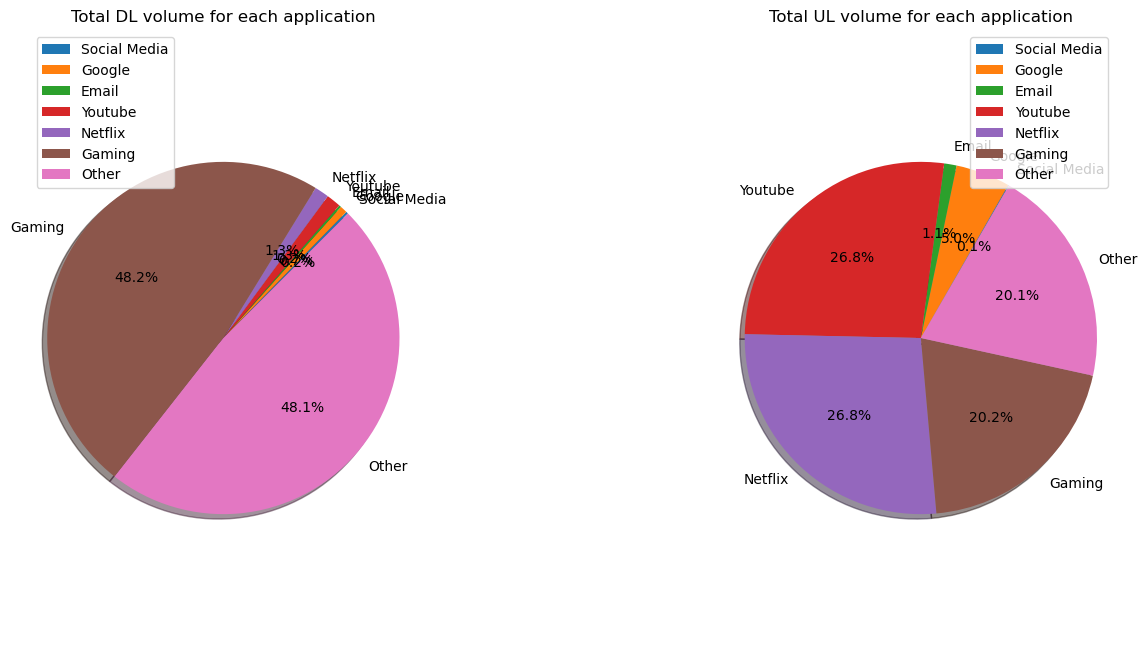

In [25]:
# Calculate the total DL data for each category
dl_data = [
    user_behavior["Social Media DL (Bytes)"].sum(),
    user_behavior["Google DL (Bytes)"].sum(),
    user_behavior["Email DL (Bytes)"].sum(),
    user_behavior["Youtube DL (Bytes)"].sum(),
    user_behavior["Netflix DL (Bytes)"].sum(),
    user_behavior["Gaming DL (Bytes)"].sum(),
    user_behavior["Other DL (Bytes)"].sum()
]

# Calculate the total UL data for each category
ul_data = [
    user_behavior["Social Media UL (Bytes)"].sum(),
    user_behavior["Google UL (Bytes)"].sum(),
    user_behavior["Email UL (Bytes)"].sum(),
    user_behavior["Youtube UL (Bytes)"].sum(),
    user_behavior["Netflix UL (Bytes)"].sum(),
    user_behavior["Gaming UL (Bytes)"].sum(),
    user_behavior["Other UL (Bytes)"].sum()
]

# Create labels for each category
labels = ["Social Media", "Google", "Email", "Youtube", "Netflix", "Gaming", "Other"]

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Plot the DL pie chart
ax1.pie(dl_data, labels=labels, autopct="%1.1f%%", startangle=45,shadow =True)
ax1.set_title("Total DL volume for each application")

# Plot the UL pie chart
ax2.pie(ul_data, labels=labels, autopct="%1.1f%%", startangle=60,shadow =True)
ax2.set_title("Total UL volume for each application")

# Set aspect ratio to be equal so that pie is drawn as a circle
ax1.axis("equal")
ax2.axis("equal")

# Add legends to the subplots
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.8)

# Display the figure
plt.show()


# Task 1.2

# 1.2.1Describe all relevent variables and associated data types

# understanding the variables

In [27]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


# Check the variables Data type

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

# 1.2.2 Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.

# Mean:
    
Definition: The mean is the average of all values in a dataset. It's calculated by adding up all the values and dividing by
            the total count.

Importance: The mean provides a central measure or average value, helping to understand the typical value in the dataset.
            It's useful for understanding the central tendency and is sensitive to extreme values (outliers).


Median:
 
Definition: The median is the middle value when the dataset is ordered from smallest to largest. If there's an even number of
            values, it's the average of the two middle values.

Importance: The median is robust to outliers and extreme values. It represents the middle value of the dataset and helps 
            understand the distribution's center.

Mode:

Definition: The mode is the value that appears most frequently in the dataset.

Importance: The mode helps identify the most common value or category within the dataset. It's especially useful for 
            categorical data and understanding the dataset's peaks or clusters.

Standard Deviation:

Definition: The standard deviation measures the amount of variation or dispersion in a dataset. It quantifies how much the
            values differ from the mean.

Importance: A higher standard deviation indicates greater variability or spread in the data, while a lower standard deviation
            suggests that values are closer to the mean. It's essential for understanding the distribution of data points.
 
Range:
 
Definition: The range is the difference between the maximum and minimum values in the dataset.

Importance: It provides a simple measure of the spread or extent of the dataset. A wider range suggests greater variability 
            among values.

Importance for the Global Objective:
    
Understanding Variation: These metrics collectively provide insights into how data points are distributed, whether they are 
                         concentrated around the mean or spread out widely.

Identifying Outliers: Metrics like mean and standard deviation help detect outliers or unusual values that might impact 
                      analyses or models.

Decision Making: They aid in decision-making processes by providing a concise summary of the dataset, allowing stakeholders
                  to grasp essential characteristics quickly.

Comparative Analysis: These metrics allow comparisons between different datasets or subsets within the data, aiding in making
    informed comparisons or identifying trends.

    For the global objective, these basic metrics are crucial for summarizing and understanding the dataset's characteristics,
 
guiding decision-making processes, and identifying key trends or outliers that might influence strategic decisions or 

analytical models. They provide a foundational understanding of the data landscape, enabling better-informed actions

towards the global objective.







# 1.2.3 Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable
and provide useful interpretation.


In [23]:
range_values = data.max() - data.min()

# Variance calculation
variance_values = data.var()

# Standard deviation calculation
std_dev_values = data.std()

# Interquartile Range (IQR) calculation
iqr_values = data.quantile(0.75) - data.quantile(0.25)

# Coefficient of Variation (CV) calculation
mean_values = data.mean()
cv_values = (std_dev_values / mean_values) * 100

# Displaying the computed dispersion parameters
dispersion_params = pd.DataFrame({
    'Range': range_values,
    'Variance': variance_values,
    'Std Deviation': std_dev_values,
    'IQR': iqr_values,
    'CV': cv_values
})

print(dispersion_params)

                                                      Range      Variance  \
10 Kbps < UL TP < 50 Kbps (%)                          98.0  1.040176e+01   
250 Kbps < DL TP < 1 Mbps (%)                         100.0  1.730176e+01   
50 Kbps < DL TP < 250 Kbps (%)                         93.0  3.862912e+01   
50 Kbps < UL TP < 300 Kbps (%)                        100.0  2.639076e+00   
Activity Duration DL (ms)                       136536461.0  3.244892e+13   
Activity Duration UL (ms)                       144911293.0  2.155959e+13   
Avg Bearer TP DL (kbps)                            378160.0  5.746510e+08   
Avg Bearer TP UL (kbps)                             58613.0  2.139391e+07   
Avg RTT DL (ms)                                     96923.0  3.841306e+05   
Avg RTT UL (ms)                                      7120.0  7.189942e+03   
DL TP < 50 Kbps (%)                                   100.0  1.699903e+02   
DL TP > 1 Mbps (%)                                     94.0  2.331818e+01   

# 1.2.4Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable
and interpreting your findings.

In [9]:
float_columns = ['Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']

object_columns = ['Bearer Id', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']

data_float_filled = data[float_columns].fillna(data[float_columns].mean())

data_object_filled = data[object_columns].fillna(data[object_columns].mode().iloc[0])

df = pd.concat([data_float_filled, data_object_filled], axis=1)
#df

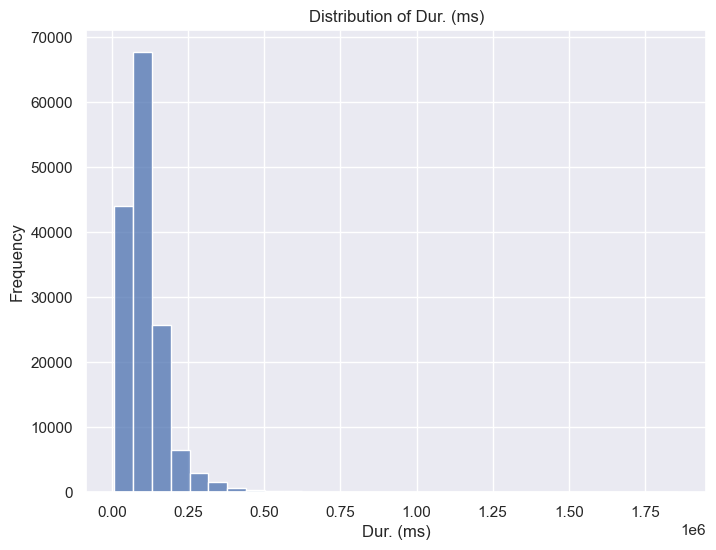

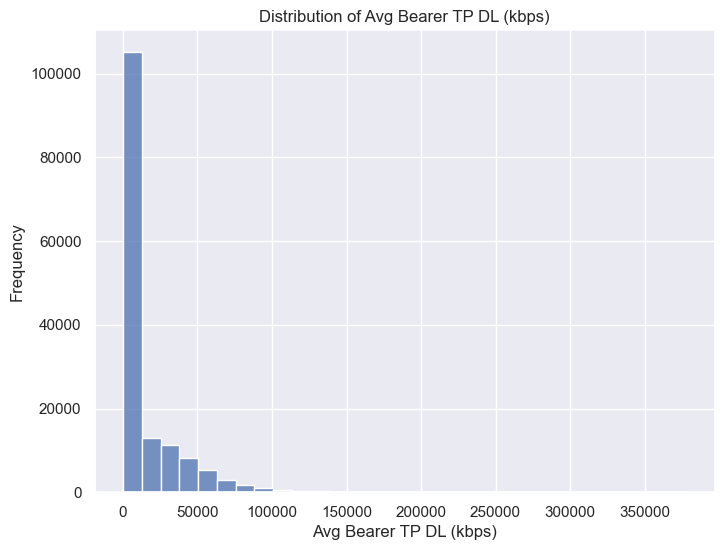

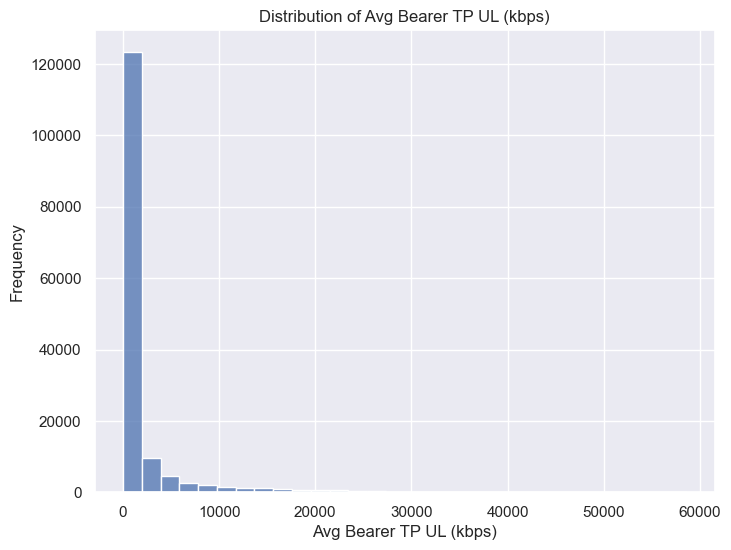

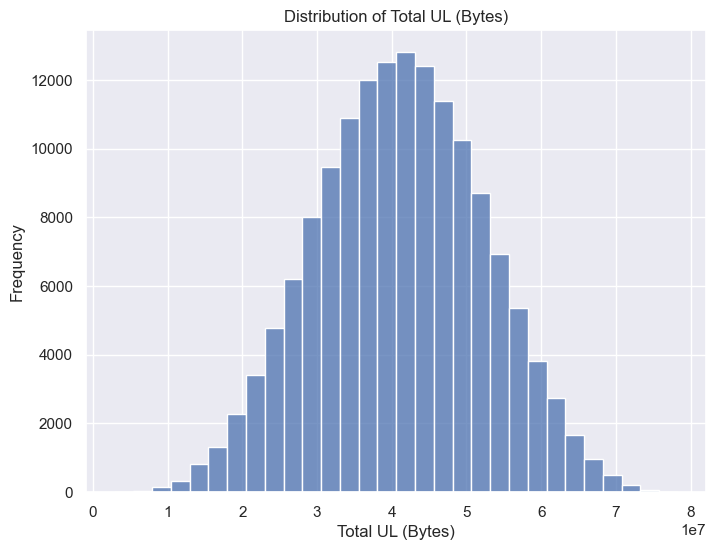

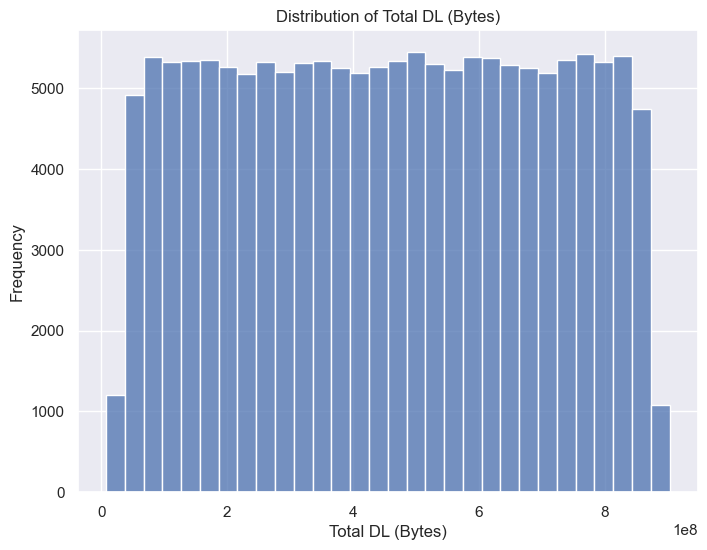

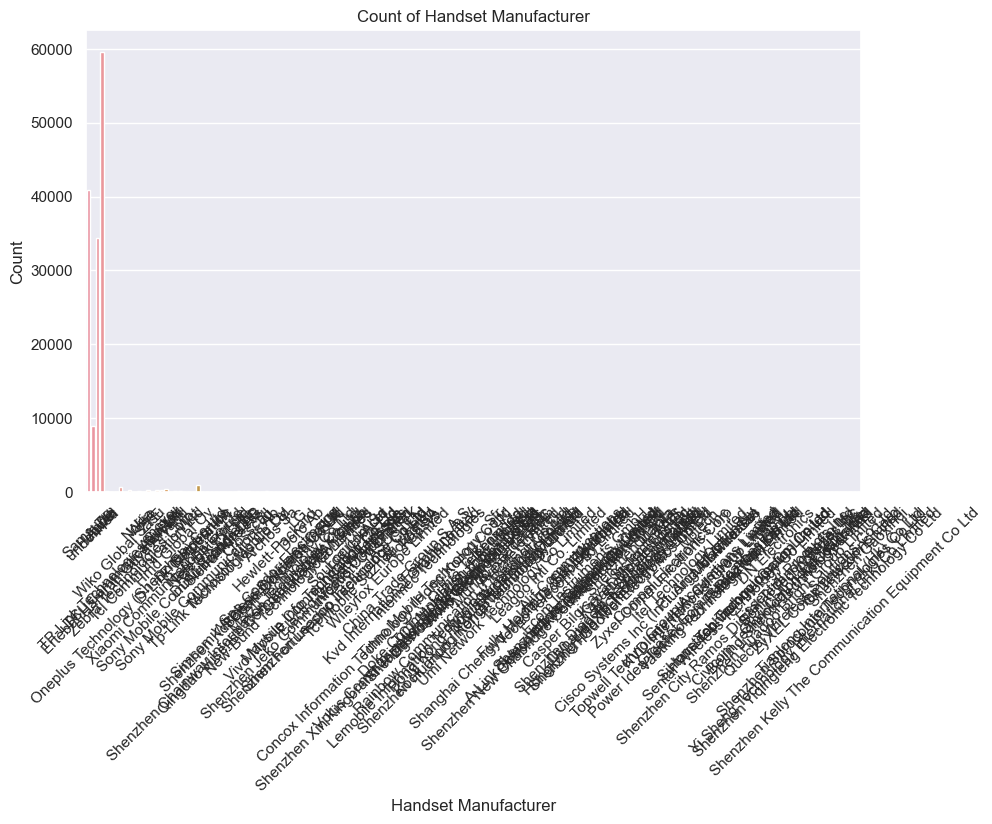

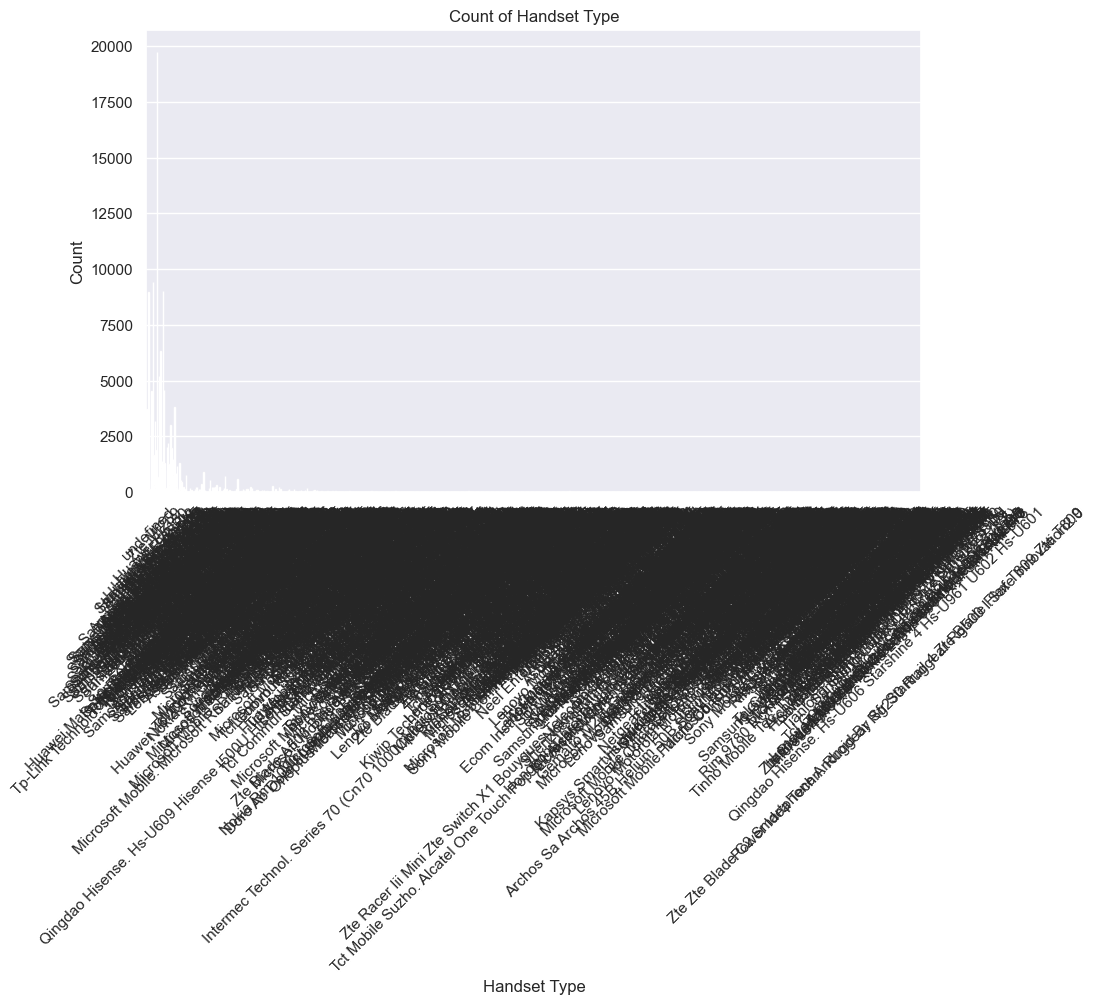

In [8]:
# Plotting options for each variable 

sns.set(style="darkgrid")

# Numerical variables
numerical_vars = ['Dur. (ms)','Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Total UL (Bytes)','Total DL (Bytes)']
                  
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Categorical variables
categorical_vars = ['Handset Manufacturer', 'Handset Type']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=var)
    plt.title(f'Count of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# 1.2.5 Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods
and interpret your findings.

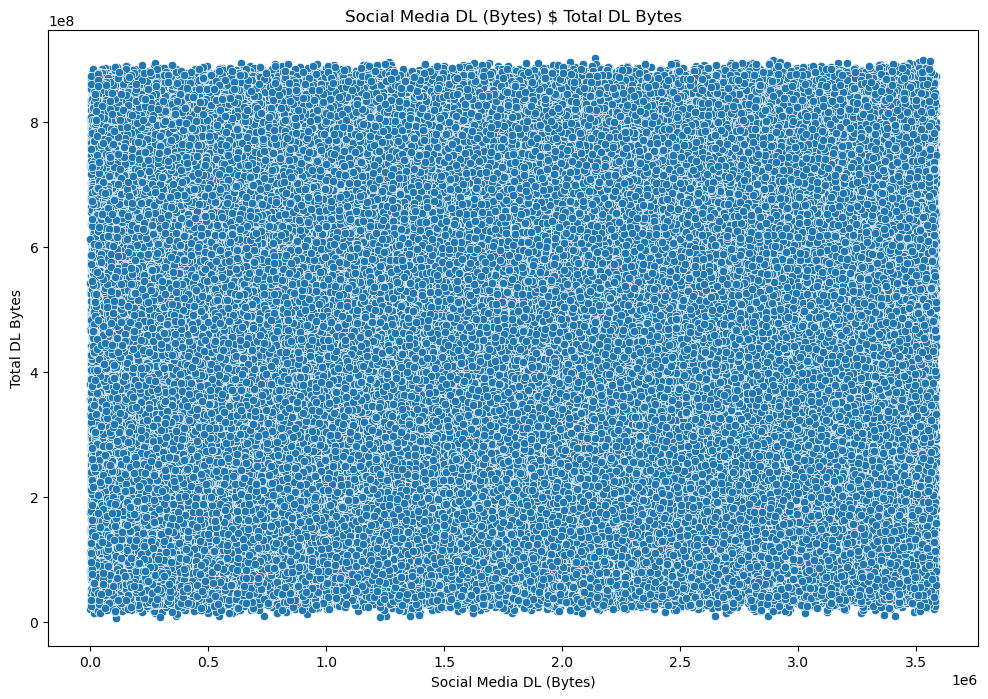

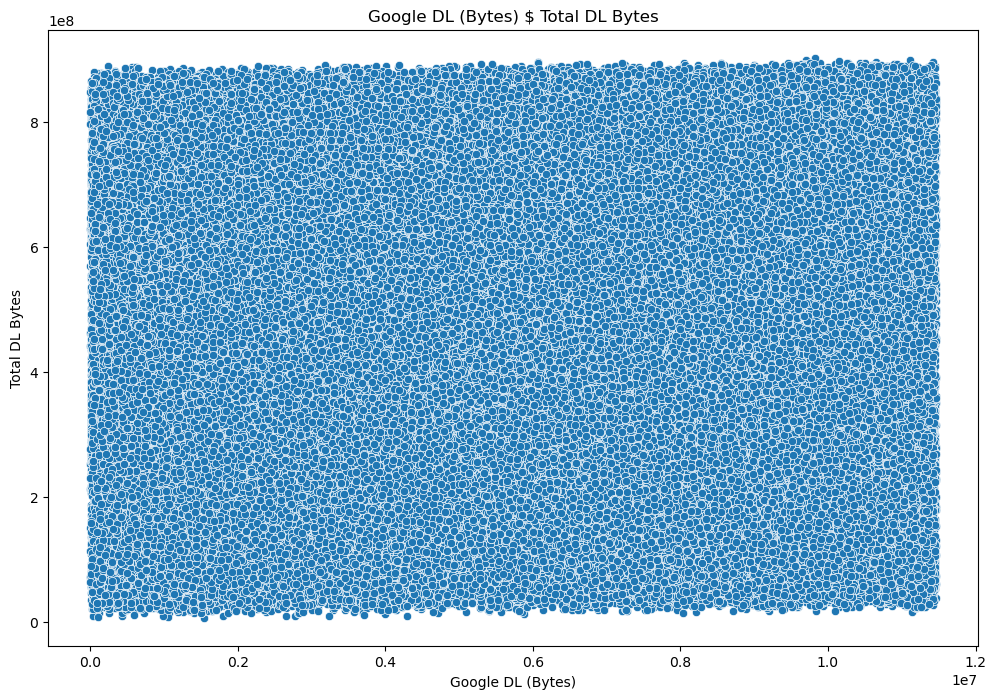

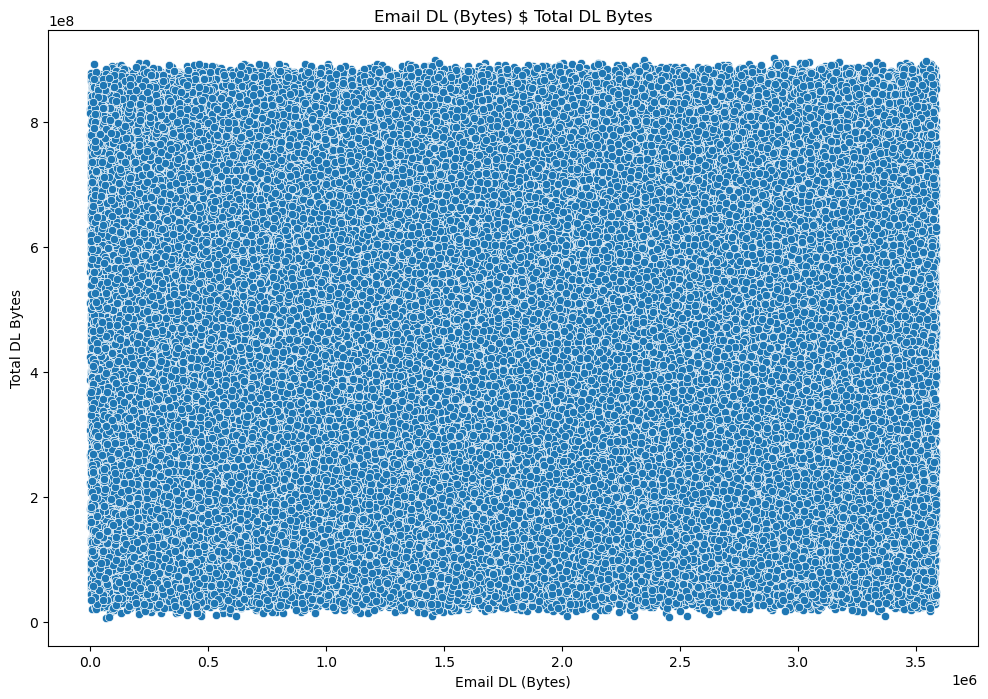

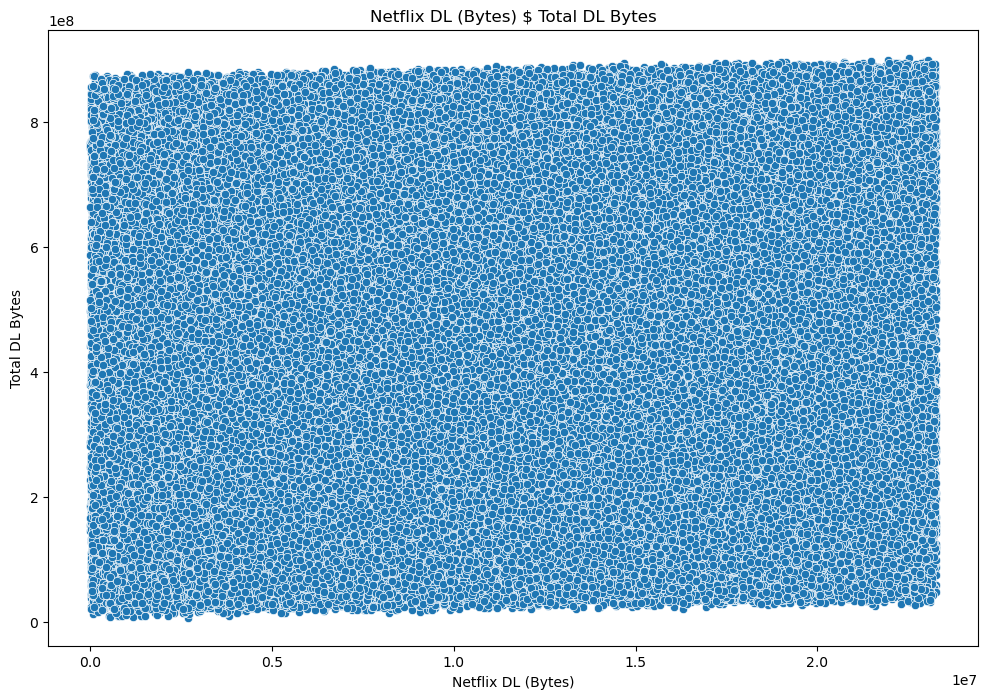

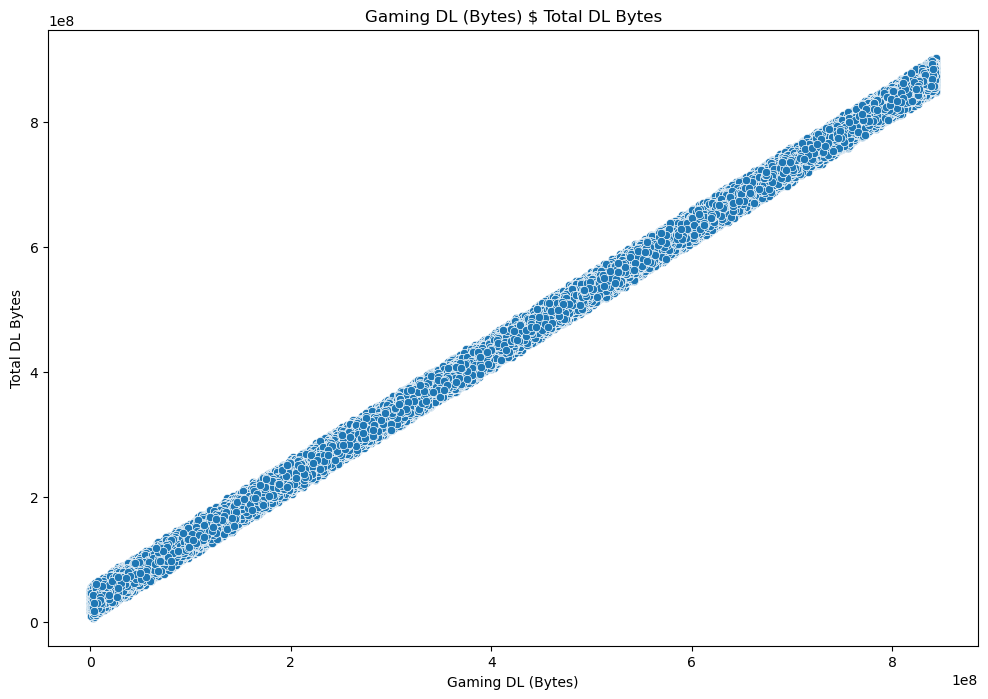

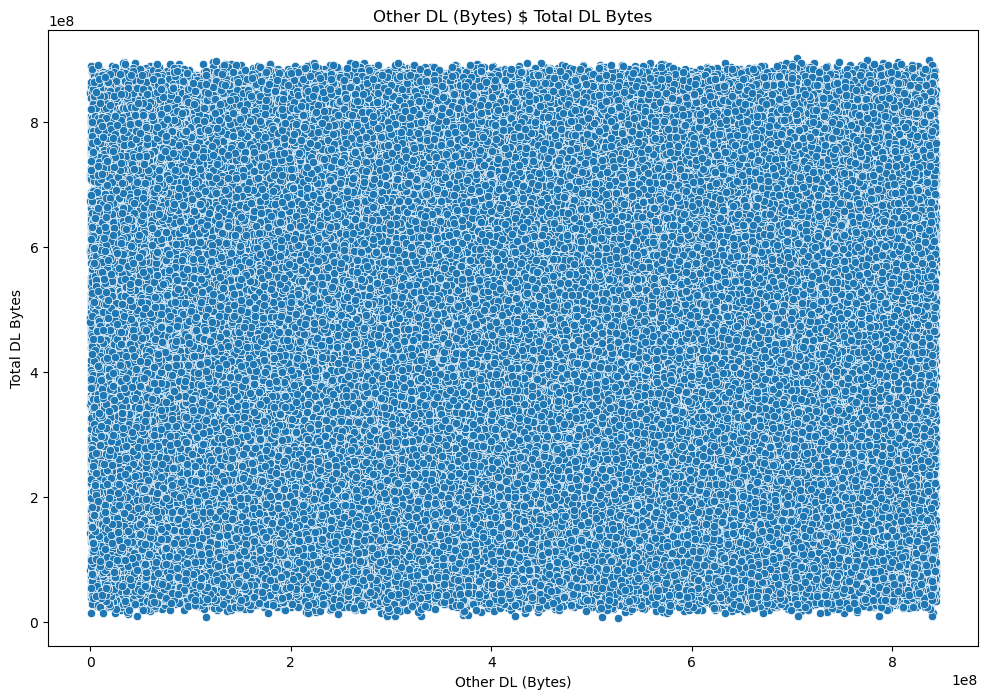

In [22]:
# Bivariate Analysis

vars=['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)','Netflix DL (Bytes)','Gaming DL (Bytes)',
      'Other DL (Bytes)']

# Scatter plots

for i in vars:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data = data,x= i,y ='Total DL (Bytes)')
    plt.title(f'{i} $ Total DL Bytes')
    plt.xlabel(i)
    plt.ylabel("Total DL Bytes")
    plt.show()

# 1.2.6 Variable transformations – segment the users into the top five decile classes
based on the total durationfor all sessions and compute the total data (DL+UL) per decile class.

In [14]:
import pandas as pd

# Assuming you have a DataFrame 'data' with columns 'Bearer_Id', 'Dur.(ms).1', 'Total DL(Bytes)', and 'Total UL(Bytes)'

# Step 1: Calculate total session duration per user
total_duration_per_user = data.groupby('Bearer Id')['Dur. (ms).1'].sum().reset_index()

# Step 2: Assign Decile Classes
total_duration_per_user['duration_decile'] = pd.qcut(total_duration_per_user['Dur. (ms).1'], 10, labels=False)

# Step 3: Compute Total Data for Each Decile Class
user_data_with_deciles = pd.merge(data, total_duration_per_user[['Bearer Id', 'duration_decile']], on='Bearer Id')

data_per_decile = user_data_with_deciles.groupby('duration_decile')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

# Optionally, you can calculate total data (DL+UL) for each decile class
data_per_decile['total_data'] = data_per_decile['Total DL (Bytes)'] + data_per_decile['Total UL (Bytes)']

# Display the total data for each decile class
print(data_per_decile)

                 Total DL (Bytes)  Total UL (Bytes)    total_data
duration_decile                                                  
0                    6.208639e+12      5.605879e+11  6.769227e+12
1                    6.489353e+12      5.855947e+11  7.074947e+12
2                    6.612917e+12      5.984504e+11  7.211367e+12
3                    6.172484e+12      5.619522e+11  6.734436e+12
4                    6.125091e+12      5.538118e+11  6.678903e+12
5                    6.240589e+12      5.656746e+11  6.806264e+12
6                    6.270228e+12      5.710628e+11  6.841291e+12
7                    6.610289e+12      5.907287e+11  7.201018e+12
8                    8.179298e+12      7.412953e+11  8.920593e+12
9                    9.287627e+12      8.390227e+11  1.012665e+13


# # 1.2.7Correlation Analysis –compute a correlation matrix for the following variables and interpret your findings:
    Social Media data,Google data, Email data, Youtube data, Netflix data, Gaming data, and Other data 


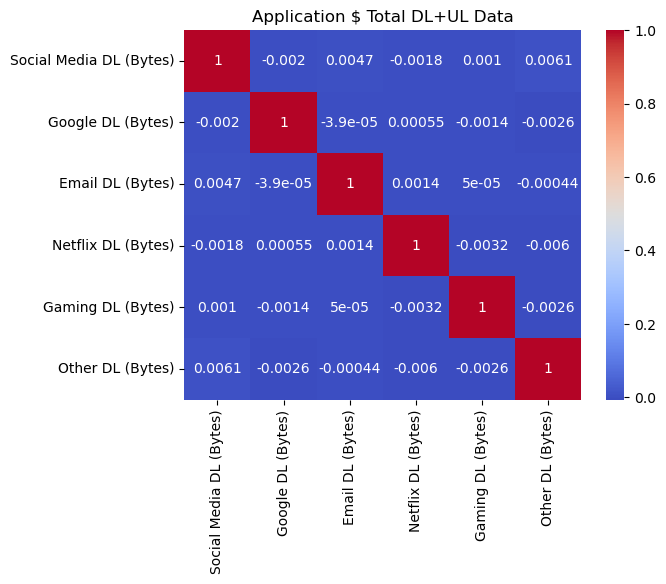

In [24]:
# Correlation Analysis

vars=['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)','Netflix DL (Bytes)','Gaming DL (Bytes)',
      'Other DL (Bytes)']

# subset dataframe with selected columns

df = data[vars]
                   
# Correlation matrix

correlation_matrix = df.corr()

#plot correlation matrix using heatmap

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title("Application $ Total DL+UL Data")

plt.show()

# 1.2.8 Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and 
#provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points maximum). 


In [10]:
from sklearn.decomposition import PCA

# The columns for PCA
selected_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)',
                    'Other DL (Bytes)']

# DataFrame with the selected columns
data_for_pca = data[selected_columns]

# Initialize PCA 
pca = PCA(n_components=2)

# Fit and transform the data using PCA
pca_result = pca.fit_transform(data_for_pca)

# Access the principal components
pca_components = pca.components_

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.501595   0.49753482]
